<a href="https://colab.research.google.com/github/CodesByVishal/GlobusSoft-Assignment/blob/main/Task_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement:**
Build a text classification model to categorize sentences into ten categories: Education, Ecommerce, Technology, Healthcare, Entertainment, Finance, News, Travel, Sports, and Other. The dataset is unlabeled and noisy (containing links, emojis, etc.), requiring data annotation and preprocessing. The final model should achieve good accuracy, and only the best-performing model should be submitted.

**Deliverables:**

Preprocessing, Training, and Prediction scripts (.ipynb).

A saved model file (.pkl or other format).

At least 10 test predictions in the training script.

# **Importing essential libraries**

In [ ]:
# Loading the necessary libraries
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.pipeline import Pipeline
import nltk
nltk.download("punkt")

from sklearn.preprocessing import FunctionTransformer
import re
import string
from sklearn.feature_extraction.text import TfidfVectorizer


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Load The DataSet**

In [ ]:
file_path = '/content/drive/MyDrive/Globussoft Assignment/Task 2/dataset.csv'
df = pd.read_csv(file_path)

In [ ]:
# First look of the Dataset
df.head()

,text
0,Turn on the profile picture guard to make your...
1,►►►hier klicken: http://bit.ly/freiheitsdressu...
2,"Weekend deal alert! Outdo Santa, today only, w..."
3,THIS TEENAGE GIRL SHARES THE BIGGEST SECRET OF...
4,Easy & convenient access to professional guida...


In [ ]:
# Checking the size and shape of  Raw DataFrame
print(f"The dataset has {df.shape[0]} rows and {df.shape[1]} columns.")
print(df.shape)

The dataset has 100000 rows and 1 columns.
(100000, 1)


In [ ]:
# checking how many missing  value in the datframe
df.isnull().sum()

,0
text,9493


In [ ]:
# Dropping the missing value rows
df = df.dropna()
df.shape

(90507, 1)

In [ ]:
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# **BASIC PREPROCESSING**

# **CLEANING UP THE DATASET & CREATING A PIPELINE**

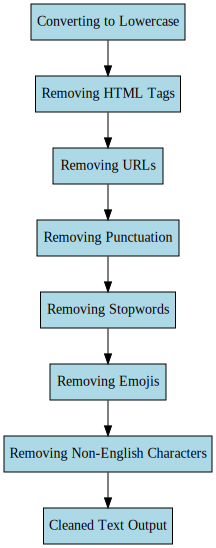

In [ ]:
# CLEANING STEPS
from graphviz import Digraph

# Create a directed graph
dot = Digraph(format='png')

# Define the pipeline steps
steps = [
    "Converting to Lowercase",
    "Removing HTML Tags",
    "Removing URLs",
    "Removing Punctuation",
    "Removing Stopwords",
    "Removing Emojis",
    "Removing Non-English Characters",
    "Cleaned Text Output"
]
# Add nodes to the graph
for i, step in enumerate(steps):
    dot.node(str(i), step, shape="box", style="filled", fillcolor="lightblue")
# Add edges (arrows) between steps
for i in range(len(steps) - 1):
    dot.edge(str(i), str(i + 1))
# Render and display the flowchart
dot.render("text_cleaning_pipeline", format="png", cleanup=False)
dot

In [ ]:

text_cleaning_pipeline = Pipeline([
    # Step 1: Convert to Lowercase
    ("Lowercase", FunctionTransformer(lambda X: pd.Series(X).str.lower(), validate=False)),

    # Step 2: Remove HTML Tags
    ("Remove HTML Tags", FunctionTransformer(lambda X: pd.Series(X).apply(
        lambda text: re.sub(r'<.*?>', '', text)), validate=False)),

    # Step 3: Remove URLs
    ("Remove URLs", FunctionTransformer(lambda X: pd.Series(X).apply(
        lambda text: re.sub(r'http[s]?://\S+', '', text)), validate=False)),

    # Step 4: Remove Punctuation
    ("Remove Punctuation", FunctionTransformer(lambda X: pd.Series(X).apply(
        lambda text: text.translate(str.maketrans('', '', string.punctuation))), validate=False)),

    # Step 5: Remove Stopwords
    ("Remove Stopwords", FunctionTransformer(lambda X: pd.Series(X).apply(
        lambda text: " ".join([word for word in text.split() if word.lower() not in stop_words])), validate=False)),

    # Step 6: Remove Emojis & Special Characters
    ("Remove Emojis", FunctionTransformer(lambda X: pd.Series(X).apply(
        lambda text: re.sub(
            r"[\U0001F600-\U0001F64F\U0001F300-\U0001F5FF\U0001F680-\U0001F6FF\U0001F700-\U0001F77F"
            r"\U0001F780-\U0001F7FF\U0001F800-\U0001F8FF\U0001F900-\U0001F9FF\U0001FA00-\U0001FA6F"
            r"\U0001FA70-\U0001FAFF\U00002702-\U000027B0\U000024C2-\U0001F251]+", '', text)), validate=False)),
    # step 7 removal of other languages
     ("Remove Non-English Characters", FunctionTransformer(lambda X: pd.Series(X).apply(
        lambda text: re.sub(r'[^\x00-\x7F]+', '', text)), validate=False))
])
df['cleaned_text'] = text_cleaning_pipeline.fit_transform(df['text'])

In [ ]:
# Display the cleaned data
df.head(6)

,text,cleaned_text
0,Turn on the profile picture guard to make your...,turn profile picture guard make profile pictur...
1,►►►hier klicken: http://bit.ly/freiheitsdressu...,hier klicken click
2,"Weekend deal alert! Outdo Santa, today only, w...",weekend deal alert outdo santa today 25 toys t...
3,THIS TEENAGE GIRL SHARES THE BIGGEST SECRET OF...,teenage girl shares biggest secret life waht s...
4,Easy & convenient access to professional guida...,easy convenient access professional guidance r...
5,Detroit Wallpaper Co. finds design inspiration...,detroit wallpaper co finds design inspiration ...


# **Making a new column label Using a Keyword Dictionary**

In [ ]:
categories = {
    'Ecommerce': [
        'Weekend','click' 'deal','cart', 'checkout', 'wishlist', 'payment', 'delivery', 'shipping', 'return',
        'refund', 'order', 'sale', 'promo', 'coupon', 'store', 'online', 'product',
        'customer', 'review', 'rating', 'inventory', 'stock', 'add to cart',
        'secure payment', 'fast shipping', 'limited offer', 'bestseller', 'trending',
        'new arrival', 'clearance', 'free shipping', 'buy now', 'flash sale',
        'guarantee', 'support', 'category', 'brand', 'loyalty', 'membership',
        'subscription', 'checkout process', 'order tracking', 'payment gateway',
        'cash on delivery', 'installment', 'return policy', 'exchange',
        'order confirmation', 'invoice', 'packaging', 'shipping address',
        'delivery date', 'customer service', 'gift card', 'loyalty points',
        'subscription box', 'bulk order', 'personalized', 'wishlist item',
        'price drop', 'compare', 'size chart', 'limited stock', 'deal of the day',
        'hot deal', 'exclusive', 'user review', 'secure checkout', 'seasonal sale',
        'flash deal' , 'off','buy'
    ],

    'Education': [
        'learn', 'study', 'course', 'class', 'teacher', 'student', 'school',
        'college', 'university', 'exam', 'test', 'assignment', 'homework',
        'degree', 'certificate', 'diploma', 'online course', 'tutorial', 'lecture',
        'syllabus', 'curriculum', 'enroll', 'admission', 'scholarship', 'tuition',
        'e-learning', 'MOOC', 'webinar', 'workshop', 'training', 'quiz', 'grade',
        'GPA', 'academic', 'library', 'research', 'project', 'skill', 'knowledge',
        'mentor', 'syllabus outline', 'online learning', 'virtual class',
        'distance education', 'blended learning', 'learning path', 'edtech',
        'course material', 'learning module', 'student portal', 'learning outcome',
        'academic year', 'term', 'semester', 'online assignment', 'plagiarism check',
        'learning app', 'skill development', 'upskilling', 'continuing education',
        'alumni', 'faculty', 'exam schedule', 'internship', 'placement', 'campus',
        'knowledge sharing', 'education board'
    ],

    'Technology': [
        'software', 'hardware', 'AI', 'machine learning', 'data', 'cloud', 'server',
        'database', 'network', 'cybersecurity', 'coding', 'programming', 'developer',
        'app', 'website', 'blockchain', 'robotics', 'automation', 'IoT', 'gadget',
        'innovation', 'virtual reality', 'augmented reality', 'algorithm', 'API',
        'IT', 'tech', 'startup', '5G', 'smartphone', 'laptop', 'processor', 'GPU',
        'system', 'platform', 'digital', 'encryption', 'UX', 'UI', 'analytics',
        'tech trends', 'innovation hub', 'tech stack', 'cloud computing',
        'edge computing', 'deep learning', 'neural network', 'data science',
        'big data', 'data mining', 'smart tech', 'wearable tech',
        'augmented intelligence', 'mobile app', 'responsive design', 'coding bootcamp',
        'source code', 'open source', 'SaaS', 'PaaS', 'DaaS', 'DevOps',
        'version control', 'Git', 'repository', 'bug fix', 'patch update',
        'tech review', 'beta version', 'tech event', 'hardware specs'
    ],

    'Healthcare': [
        'doctor', 'health', 'medicine', 'hospital', 'treatment', 'clinic', 'nurse',
        'diagnosis', 'therapy', 'surgery', 'vaccine', 'pharmacy', 'wellness',
        'appointment', 'medical', 'care', 'emergency', 'prescription',
        'healthcare provider', 'health checkup', 'health insurance', 'telemedicine',
        'medical record', 'EMR', 'health monitoring', 'first aid', 'emergency room',
        'ICU', 'ambulance', 'health plan', 'fitness', 'nutrition', 'diet',
        'mental health', 'healthcare app', 'specialist', 'healthcare support',
        'patient care', 'chronic disease', 'recovery', 'health campaign'
    ],

    'Entertainment': [
        'movie', 'music', 'game', 'series', 'entertainment', 'tv', 'show',
        'concert', 'actor', 'actress', 'festival', 'cinema', 'streaming',
        'video', 'comedy', 'drama', 'theater', 'celebrity', 'album',
        'stream', 'on demand', 'box office', 'blockbuster', 'soundtrack',
        'music video', 'DJ', 'live performance', 'gaming', 'multiplayer',
        'arcade', 'trailer', 'premiere', 'episode', 'reality show',
        'binge watch', 'comics', 'animation', 'voiceover', 'celebrity news',
        'gossip', 'red carpet', 'fanbase', 'merchandise'
    ],

    'Finance': [
        'stock', 'investment', 'bank', 'loan', 'mutual fund', 'finance',
        'insurance', 'credit', 'debit', 'currency', 'crypto', 'bitcoin',
        'savings', 'trading', 'portfolio', 'interest', 'dividend', 'budget',
        'finance planning', 'personal finance', 'interest rate', 'mortgage',
        'investment strategy', 'financial goal', 'savings account',
        'retirement fund', 'wealth management', 'tax', 'income',
        'expense', 'budgeting', 'financial advisor', 'fiscal year',
        'market trends', 'capital', 'debt', 'inflation', 'equity', 'hedge fund'
    ],

    'News': [
        'breaking', 'headline', 'news', 'report', 'update', 'journalism',
        'media', 'live', 'press', 'coverage', 'story', 'bulletin', 'interview',
        'broadcast', 'anchor', 'editor', 'opinion', 'exclusive', 'newsflash',
        'breaking news', 'daily news', 'news portal', 'media outlet',
        'press release', 'public statement', 'current affairs', 'news feed',
        'news network', 'world news', 'local news', 'politics', 'economy',
        'weather report', 'sports news', 'live update', 'special report',
        'exclusive report'
    ],

    'Travel': [
        'trip', 'travel', 'vacation', 'book', 'journey', 'destination', 'hotel',
        'flight', 'tour', 'itinerary', 'adventure', 'passport', 'visa', 'explore',
        'cruise', 'resort', 'booking', 'transport', 'airline', 'road trip',
        'travel guide', 'tourist', 'landmark', 'sightseeing', 'excursion',
        'local culture', 'travel insurance', 'travel plan', 'backpacking',
        'itinerary planner', 'hotel booking', 'staycation', 'resort stay',
        'hostel', 'airport', 'visa application', 'boarding pass', 'luggage',
        'travel gear', 'travel tips'
    ],

    'Sports': [
        'tournament', 'match', 'score', 'football', 'sports', 'goal', 'team',
        'player', 'coach', 'league', 'championship', 'cricket', 'basketball',
        'baseball', 'tennis', 'stadium', 'win', 'lose', 'rank', 'medal', 'race',
        'sports news', 'live score', 'highlight', 'trophy', 'champion', 'finals',
        'knockout', 'fixture', 'schedule', 'team lineup', 'sports gear',
        'sportsmanship', 'fans', 'stadium ticket', 'MVP', 'referee', 'goalkeeper',
        'athlete', 'sports event', 'training camp', 'fitness training', 'injury report'
    ]
}

In [ ]:
# Function to assign labels based on keywords
def assign_label(text):
    for category, keywords in categories.items():
        for word in keywords:
            if word in text:
                return category
    return "Other"

In [ ]:
# Apply function to assign labels
df["label"] = df["cleaned_text"].apply(assign_label)

In [ ]:
df["label"].value_counts().reset_index().rename(columns={"index": "Label", "label_column": "Frequency"})

,label,count
0,Other,30492
1,Ecommerce,26458
2,Education,8274
3,Entertainment,6823
4,Technology,6296
5,Sports,3288
6,Travel,2614
7,News,2603
8,Healthcare,2315
9,Finance,1344


In [ ]:
new_df = df.groupby('label', group_keys=False).apply(lambda x: x.sample(n=min(len(x), 1344), random_state=42)).reset_index(drop=True)
final_df = new_df[['cleaned_text','label']]
final_df

<ipython-input-99-c62067a96a77>:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  new_df = df.groupby('label', group_keys=False).apply(lambda x: x.sample(n=min(len(x), 1344), random_state=42)).reset_index(drop=True)


,cleaned_text,label
0,giveaway time 3 x 100 vouchers giveaway 3 luck...,Ecommerce
1,derniers cadeaux sur butfr commandez avant 13h...,Ecommerce
2,devil knees official video music peopleschoice,Ecommerce
3,easy way build websites contentderdemo website...,Ecommerce
4,worlds advanced protein shaker bottle perfect ...,Ecommerce
...,...,...
13435,introducing holiday collectionwhat wear holida...,Travel
13436,je suis hypnotis par ta bouche tes lvres rythm...,Travel
13437,welcome cheep antiques antique vintage furnitu...,Travel
13438,avoid heart attack stroke make new years resol...,Travel


In [ ]:
final_df["label"].value_counts().reset_index().rename(columns={"index": "Label", "label_column": "Frequency"})

,label,count
0,Ecommerce,1344
1,Education,1344
2,Entertainment,1344
3,Finance,1344
4,Healthcare,1344
5,News,1344
6,Other,1344
7,Sports,1344
8,Technology,1344
9,Travel,1344


<Axes: title={'center': 'Balanced Dataset - Label Distribution'}, xlabel='label'>

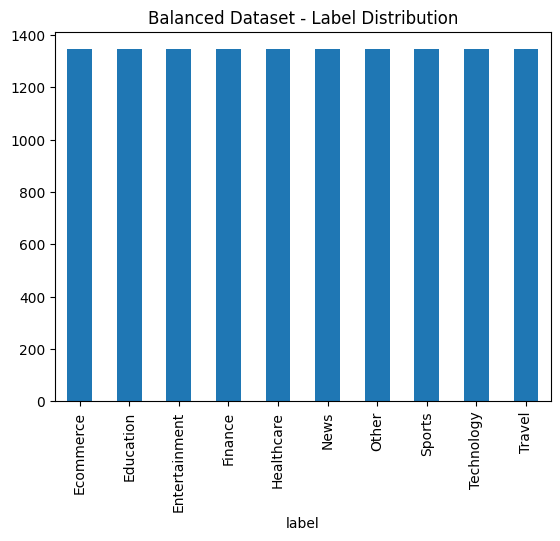

In [ ]:
final_df["label"].value_counts().plot(kind="bar", title="Balanced Dataset - Label Distribution")


# **Application of Machine Learning Algorithms**

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(final_df['cleaned_text'], final_df['label'], test_size=0.2, random_state=42)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from xgboost import XGBClassifier
import pickle



# Encode labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Define models
models = {
    'Random Forest': RandomForestClassifier(),
    'XGBClassifier': XGBClassifier(),
}

# Train and save models
for name, model in models.items():
    clf = Pipeline([('vectorizer_tfdf', TfidfVectorizer()), (name, model)])
    clf.fit(x_train, y_train_encoded)  # Use encoded labels

    y_pred = clf.predict(x_test)  # Predict numerical labels
    y_pred_labels = label_encoder.inverse_transform(y_pred)  # Convert back to category names

    # Save model
    with open(f'{name.lower().replace(" ", "_")}_model.pkl', 'wb') as file:
        pickle.dump(clf, file)

    # Print evaluation metrics
    print(f"\nResults for {name}:")
    print(classification_report(y_test, y_pred_labels))


Results for Random Forest:
               precision    recall  f1-score   support

    Ecommerce       0.98      0.71      0.83       273
    Education       0.90      0.66      0.76       270
Entertainment       0.78      0.77      0.78       278
      Finance       0.92      0.83      0.88       265
   Healthcare       0.85      0.75      0.80       260
         News       0.81      0.76      0.78       260
        Other       0.43      0.94      0.59       290
       Sports       0.78      0.72      0.75       274
   Technology       0.88      0.56      0.69       265
       Travel       0.79      0.78      0.79       253

     accuracy                           0.75      2688
    macro avg       0.81      0.75      0.76      2688
 weighted avg       0.81      0.75      0.76      2688


Results for XGBClassifier:
               precision    recall  f1-score   support

    Ecommerce       0.98      0.74      0.84       273
    Education       0.90      0.70      0.79       270
Enter

In [ ]:
import os

# Define the save folder
save_folder = "/content/drive/MyDrive/Globussoft Assignment/Task 2"
os.makedirs(save_folder, exist_ok=True)  # Create folder if it doesn't exist

# Define the model path
model_path = os.path.join(save_folder, "xgbclassifier_model.pkl")

# Save the model
with open(model_path, 'wb') as file:
    pickle.dump(models['XGBClassifier'], file)

print(f"XGBClassifier model saved at: {model_path}")



XGBClassifier model saved at: /content/drive/MyDrive/Globussoft Assignment/Task 2/xgbclassifier_model.pkl


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Load the trained model
loaded_model = pickle.load(open('xgbclassifier_model.pkl', 'rb'))


test_text = [
    "Join the Golden Llama Treasure Hunt in Dulles! We are giving away $1 Million in total rewards!",
    "Clinically proven cough medicine turns sick sleep.",
    "Meet your next winter getaway in Montreal. #ad",
    "Get full fan lashes new Covergirl Peacock Flare Mascara. Learn & save $3.",
    "Count down to the hottest show of the year. Black Friday starts 6pm Thanksgiving."
]




predictions = loaded_model.predict(test_text)
labels = {"Education": 0, "Ecommerce": 1, "Technology": 2, "Healthcare": 3, "Entertainment": 4, "Finance": 5, "News": 6,
"Travel": 7, "Sports": 8, "Other": 9}

# Print predictions
for i, text in enumerate(test_text):
    predicted_label = predictions[i]
    for category, label in labels.items():
        if label == predicted_label:
            print(f"\nText: {text}")
            print(f"Predicted category: {category}")





Text: Join the Golden Llama Treasure Hunt in Dulles! We are giving away $1 Million in total rewards!
Predicted category: Travel

Text: Clinically proven cough medicine turns sick sleep.
Predicted category: Entertainment

Text: Meet your next winter getaway in Montreal. #ad
Predicted category: Travel

Text: Get full fan lashes new Covergirl Peacock Flare Mascara. Learn & save $3.
Predicted category: Ecommerce

Text: Count down to the hottest show of the year. Black Friday starts 6pm Thanksgiving.
Predicted category: Ecommerce
